In [2]:
rm(list = ls())         # Remove all objects from the workspace
graphics.off()          # Close all open graphics devices

# Load required libraries
library(settings)       # For resetting global options
reset(options)          # Reset all global options to default values

library(nlmeU)          # For datasets
library(nlme)           # For model implementation
library(lattice)        # For lattice plotting
library(corrplot)       # For correlation matrix visualization
library(plot.matrix)    # For matrix plots
library(MASS)           # For statistical functions
library(car)            # For regression diagnostics
library(lme4)           # For mixed-effects models
library(insight)        # For model insight extraction
library(rgeoda)         # For geospatial analysis
library(sf)             # For handling spatial data
library(sp)             # For spatial data management
library(gstat)          # For geostatistical analysis
library(geoR)           # For geostatistical modeling
library(geojsonio)
library(KFAS)
library(HMM)

#set.seed(????)

# Set working directory
setwd("/Users/amirh_jandaghian/Documents/")

In [ ]:
# 10964330 Jandaghian, Amirhossein

In [17]:
data  <- read.table('/Users/amirh_jandaghian/Downloads/AS Exam/FunctionalTraining.txt')
head(data)

,Views,Premium_account,Laptop_time,Phone_time,Social_connections,Fitness_level,Language
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,61.28905,1,2.92,3.60,20.78,0,English
2,60.65593,0,2.83,3.55,19.76,0,English
3,60.62486,1,2.26,1.88,20.49,1,English
4,67.50879,1,1.41,3.35,20.40,1,English
5,60.34134,0,2.48,3.56,19.10,0,English
6,61.72881,0,3.55,3.66,19.11,0,English


In [18]:
#new column with (Laptop time + 1/2Phone time)
data$total_time <- data$Laptop + 0.5*data$Phone
head(data)

,Views,Premium_account,Laptop_time,Phone_time,Social_connections,Fitness_level,Language,total_time
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,61.28905,1,2.92,3.60,20.78,0,English,4.720
2,60.65593,0,2.83,3.55,19.76,0,English,4.605
3,60.62486,1,2.26,1.88,20.49,1,English,3.200
4,67.50879,1,1.41,3.35,20.40,1,English,3.085
5,60.34134,0,2.48,3.56,19.10,0,English,4.260
6,61.72881,0,3.55,3.66,19.11,0,English,5.380


In [21]:
# assuming the data are independent and identically distributed

# Views is predicted based on the variables Premium account, (Laptop time + 1 2Phone time),Social connections, and Fitness level

lm0.form <- Views ~ -1 + Premium_account + total_time + Social_connections + Fitness_level 

M0 =  lm(lm0.form, data = data)
sum = summary(M0) 
summary(M0) 


Call:
lm(formula = lm0.form, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8326  -3.4916   0.2761   3.5627  17.7768 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
Premium_account     1.72283    0.33566   5.133 3.43e-07 ***
total_time          3.49221    0.16057  21.749  < 2e-16 ***
Social_connections  2.36737    0.03512  67.415  < 2e-16 ***
Fitness_level       4.72895    0.41191  11.480  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.216 on 996 degrees of freedom
Multiple R-squared:  0.9933,	Adjusted R-squared:  0.9933 
F-statistic: 3.714e+04 on 4 and 996 DF,  p-value: < 2.2e-16


In [23]:
# test
linearHypothesis(M0,
                  rbind(c(0,0,1,0)),
                  c(0))

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,997,150723.96,NA,NA,NA,NA
2,996,27094.03,1,123629.9,4544.743,0


In [26]:
#Compute and report the 95% prediction interval [lower, upper] for Views through M0 for a beginner English user with a premium account, who stays 5 hours on average on the laptop and 2 on the phone, and has 10 friends on the platform.

X.new <- data.frame(Premium_account = c(1), total_time=c(5+0.5*2), Social_connections=c(10), Fitness_level=c(0), Language = 'English')
X.new

Premium_account,total_time,Social_connections,Fitness_level,Language
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6,10,0,English


In [29]:
IC <-predict(M0, X.new, interval="confidence", level=0.95)
IC 

,fit,lwr,upr
1,46.34981,45.01254,47.68707


In [30]:
IP <-predict(M0, X.new, interval="prediction", level=0.95)
IP 

,fit,lwr,upr
1,46.34981,36.02792,56.67169


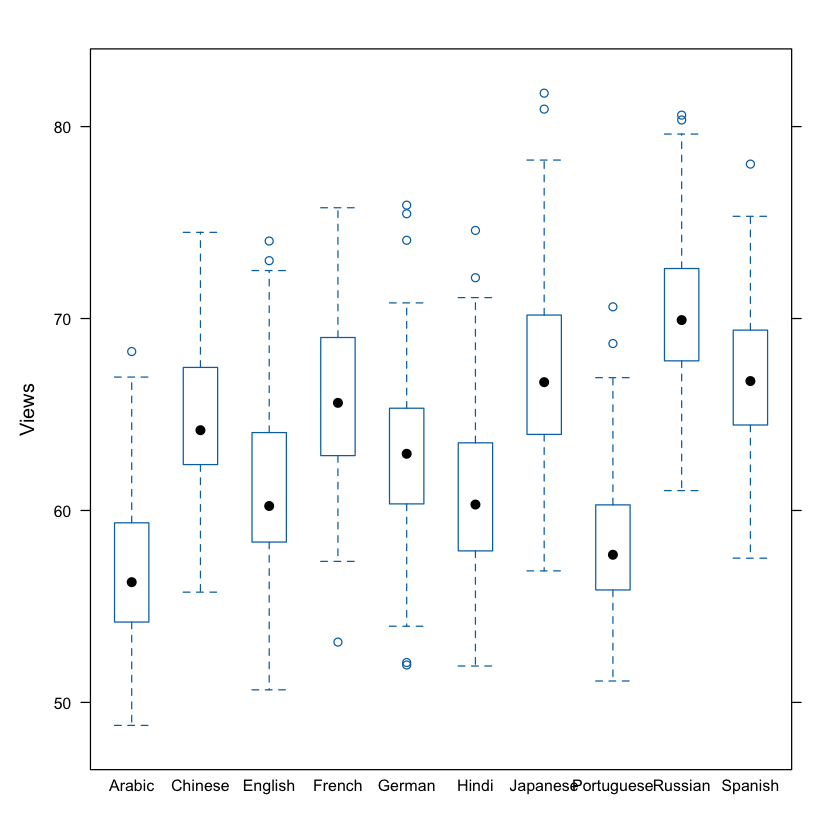

In [47]:
#boxplot for views based on language
bw1 <- bwplot(Views ~ Language , data = data)
bw1

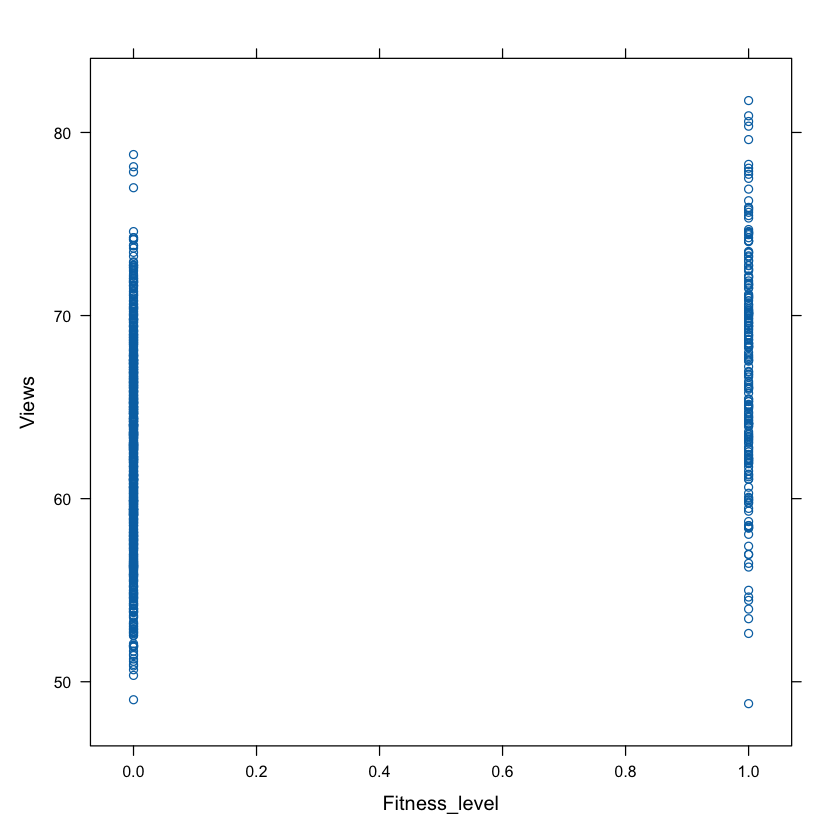

In [52]:
xy1 <- xyplot(Views ~ Fitness_level ,
    data = data,
    type = "p",
    lty = 1
)
xy1

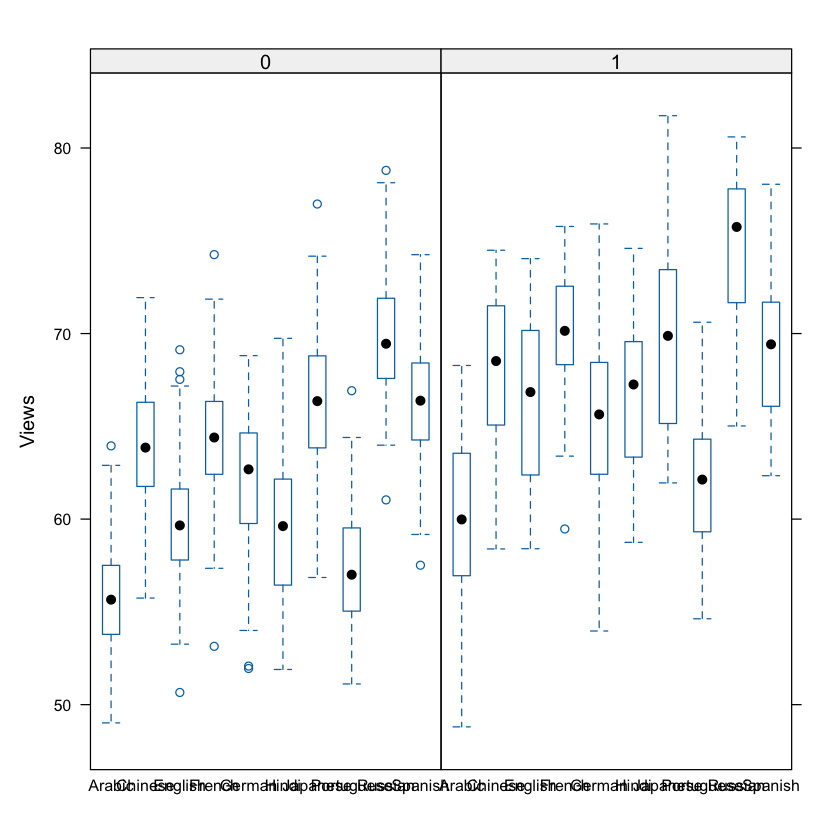

In [57]:
#boxplot for views based on language
bw1 <- bwplot(Views ~ Language | factor(Fitness_level) , data = data)
bw1

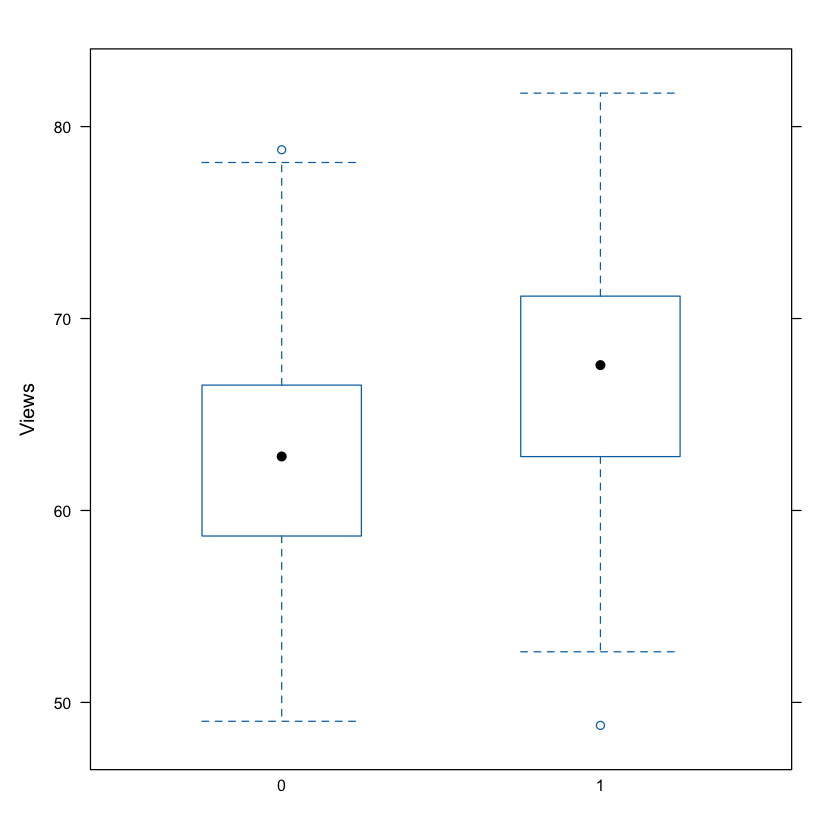

In [58]:
#boxplot for views based on language
bw1 <- bwplot(Views ~ factor(Fitness_level) , data = data)
bw1

In [74]:
M1 = lme(lm0.form, data = data, random = ~1| Language)
summary(M1)

Linear mixed-effects model fit by REML
  Data: data 
       AIC      BIC    logLik
  4263.928 4293.351 -2125.964

Random effects:
 Formula: ~1 | Language
        (Intercept) Residual
StdDev:    57.45798 1.907946

Fixed effects:  list(lm0.form) 
                       Value  Std.Error  DF  t-value p-value
Premium_account     1.931667 0.12316943 987 15.68301       0
total_time          2.975590 0.05948389 987 50.02346       0
Social_connections -0.399527 0.06154594 987 -6.49152       0
Fitness_level       5.182602 0.15122557 987 34.27067       0
 Correlation: 
                   Prmm_c ttl_tm Scl_cn
total_time         -0.018              
Social_connections -0.024 -0.046       
Fitness_level       0.030  0.038 -0.063

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-4.940952461 -0.446855591 -0.005097257  0.442496144  4.047166255 

Number of Observations: 1000
Number of Groups: 10 

In [75]:
AIC(M0, M1)

Warning message in AIC.default(M0, M1):
"models are not all fitted to the same number of observations"


,df,AIC
,<dbl>,<dbl>
M0,5,6147.191
M1,6,4263.928


In [71]:
summary(M1)

Linear mixed-effects model fit by REML
  Data: data 
       AIC      BIC    logLik
  4238.534 4277.764 -2111.267

Random effects:
 Formula: ~1 + Fitness_level | Language
 Structure: General positive-definite, Log-Cholesky parametrization
              StdDev    Corr  
(Intercept)   57.363793 (Intr)
Fitness_level  3.436726 -0.952
Residual       1.864341       

Fixed effects:  list(lm0.form) 
                       Value Std.Error  DF  t-value p-value
Premium_account     1.926452 0.1211756 987 15.89801       0
total_time          2.979739 0.0582381 987 51.16475       0
Social_connections -0.395274 0.0603709 987 -6.54742       0
Fitness_level       8.478376 0.3728982 987 22.73643       0
 Correlation: 
                   Prmm_c ttl_tm Scl_cn
total_time         -0.016              
Social_connections -0.028 -0.046       
Fitness_level       0.007 -0.012 -0.205

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-4.438415819 -0.445306976 

In [77]:
M2 = lme(lm0.form, data = data, random = ~ 1 | Language, weights = varIdent(form = ~ 1 | factor(Fitness_level) ))
summary(M2)

Linear mixed-effects model fit by REML
  Data: data 
       AIC      BIC    logLik
  3572.191 3606.517 -1779.096

Random effects:
 Formula: ~1 | Language
        (Intercept) Residual
StdDev:    58.41924 1.034497

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | factor(Fitness_level) 
 Parameter estimates:
      0       1 
1.00000 3.60456 
Fixed effects:  list(lm0.form) 
                       Value  Std.Error  DF   t-value p-value
Premium_account     2.055011 0.07429153 987  27.66144       0
total_time          2.970440 0.03503354 987  84.78846       0
Social_connections -0.450655 0.03674573 987 -12.26414       0
Fitness_level       5.183426 0.26510778 987  19.55215       0
 Correlation: 
                   Prmm_c ttl_tm Scl_cn
total_time         -0.014              
Social_connections -0.048 -0.049       
Fitness_level       0.011  0.013 -0.022

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.9

In [80]:
AIC(M1, M2) 

,df,AIC
,<dbl>,<dbl>
M1,6,4263.928
M2,7,3572.191
